# 6조
```
팀장 : 이예준

팀원 : 최수연, 최아름
```

## 개요
저희 팀은 GDP가 가장 높은 10개국, 가장 낮은 10개국을 중심으로 다양한 parameter 간의(확진자, 인구수, 국토면적, 사망자, GDP, 완치, 인구밀도 등) 상관관계와 수치를 분석했습니다.

그러한 수치가 나오게 된 이유를 함께 토론했고 이를 시각화 해보았습니다.

In [46]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib
import os, warnings
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df1 = pd.read_csv('C:/Users/user/LikeLion_AI/data/CSV/today_corona_edit.csv')    # 90개국의 정보
df2 = pd.read_csv('C:/Users/user/LikeLion_AI/data/CSV/Natl_GDP.csv')             # 90개국의 GDP 정보

## 데이터 처리 과정

In [47]:
df1

,국가,확진자,치료중,사망자,완치,치명(%),완치(%),발생률,인구수,국토면적
0,중국,91629,512.0,4636,86481.0,5,94.0,64,1439323776,9640821
1,인도,29977861,662521.0,389302,28926038.0,1,97.0,21723,1380004385,3287263
2,미국,34419838,5034868.0,617463,28767507.0,2,84.0,103987,331002651,9833517
3,인도네시아,2004445,147728.0,54956,1801761.0,3,90.0,7328,273523615,1904569
4,파키스탄,949838,33452.0,22034,894352.0,2,94.0,4300,220892340,796095
5,브라질,17969806,1178597.0,502817,16288392.0,3,91.0,84540,212559417,8515770
6,나이지리아,167292,1377.0,2118,163797.0,1,98.0,812,206139589,923768
7,방글라데시,856304,57196.0,13626,785482.0,2,92.0,5200,164689383,143998
8,러시아,5334204,326070.0,129801,4878333.0,2,92.0,36552,145934462,17125407
9,멕시코,2478551,273052.0,231244,1974255.0,9,80.0,19224,128932753,1964375


In [49]:
## 위의 두 자료를 합치는 과정
target = list(df1['국가'])
country = list(df2['국가'])

gdp = list(df2['2021'])
idx_list = []
new_cty = []
gdp_list = []

for i in target:
    for idx, one in enumerate(country):
        if i == one:
            idx_list.append(idx)
        
for i in idx_list:
    new_cty.append(country[i])
    if gdp[i] == 'no data':
        gdp_list.append(0.0)
    else:
        gdp_list.append(float(gdp[i]))
        
for i in range(90):
    print(target[i], gdp_list[i])

중국 16642.318
인도 3049.704
미국 22675.271
인도네시아 1158.783
파키스탄 0.0
브라질 1491.772
나이지리아 514.049
방글라데시 352.908
러시아 1710.734
멕시코 1192.48
일본 5378.136
에티오피아 93.966
필리핀 402.638
이집트 394.284
베트남 354.868
콩고민주공화국 12.022
터키 794.53
이란 682.859
독일 4319.286
태국 538.735
영국 3124.65
프랑스 2938.271
이탈리아 2106.287
탄자니아 65.919
남아프리카 공화국 329.529
미얀마 76.195
케냐 106.041
대한민국 1806.707
콜롬비아 295.61
스페인 1461.552
우간다 41.271
아르헨티나 418.15
알제리 151.459
수단 35.827
우크라이나 164.593
이라크 190.733
아프가니스탄 19.938
폴란드 642.121
캐나다 1883.487
모로코 124.003
사우디아라비아 804.921
우즈베키스탄 61.203
페루 225.918
앙골라 66.493
말레이시아 387.093
모잠비크 13.957
가나 74.26
예멘 25.095
네팔 36.084
베네수엘라 42.53
마다가스카르 14.746
카메룬 44.893
코트디부아르 70.991
호주 1617.543
니제르 15.899
대만 759.104
스리랑카 84.532
부르키나파소 18.853
말리 19.912
루마니아 289.13
말라위 9.268
칠레 307.938
카자흐스탄 187.836
잠비아 18.955
과테말라 81.402
에콰도르 100.595
시리아 0.0
네덜란드 1012.598
세네갈 27.927
캄보디아 27.239
차드 12.531
소말리아 5.367
짐바브웨 26.085
기니 16.339
르완다 10.633
베냉 17.327
부룬디 3.244
튀니지 44.265
볼리비아 43.11
벨기에 578.996
아이티 22.431
남수단 4.461
도미니카 공화국 83.917

### 정확한 통계를 위해 중국은 삭제한다 ...!!

In [51]:
gdp_list = pd.DataFrame(gdp_list)
df1['GDP'] = gdp_list
# df1 = df1.drop([0])
df3 = df1.sort_values(by='인구수', ascending=False).head(30)
# df3 = df3.drop([1])
df1

,국가,확진자,치료중,사망자,완치,치명(%),완치(%),발생률,인구수,국토면적,GDP
1,인도,29977861,662521.0,389302,28926038.0,1,97.0,21723,1380004385,3287263,3049.704
2,미국,34419838,5034868.0,617463,28767507.0,2,84.0,103987,331002651,9833517,22675.271
3,인도네시아,2004445,147728.0,54956,1801761.0,3,90.0,7328,273523615,1904569,1158.783
4,파키스탄,949838,33452.0,22034,894352.0,2,94.0,4300,220892340,796095,0.000
5,브라질,17969806,1178597.0,502817,16288392.0,3,91.0,84540,212559417,8515770,1491.772
6,나이지리아,167292,1377.0,2118,163797.0,1,98.0,812,206139589,923768,514.049
7,방글라데시,856304,57196.0,13626,785482.0,2,92.0,5200,164689383,143998,352.908
8,러시아,5334204,326070.0,129801,4878333.0,2,92.0,36552,145934462,17125407,1710.734
9,멕시코,2478551,273052.0,231244,1974255.0,9,80.0,19224,128932753,1964375,1192.480
10,일본,785969,22248.0,14439,749282.0,2,95.0,6214,126476461,377975,5378.136


In [7]:
%matplotlib inline 

In [8]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

In [117]:
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

## 인구수 하위 30개국 확진자 비율

### 인도의 인구수가 다른 나라들에 비해 매우 많으므로 일시적으로 제외시켰습니다.

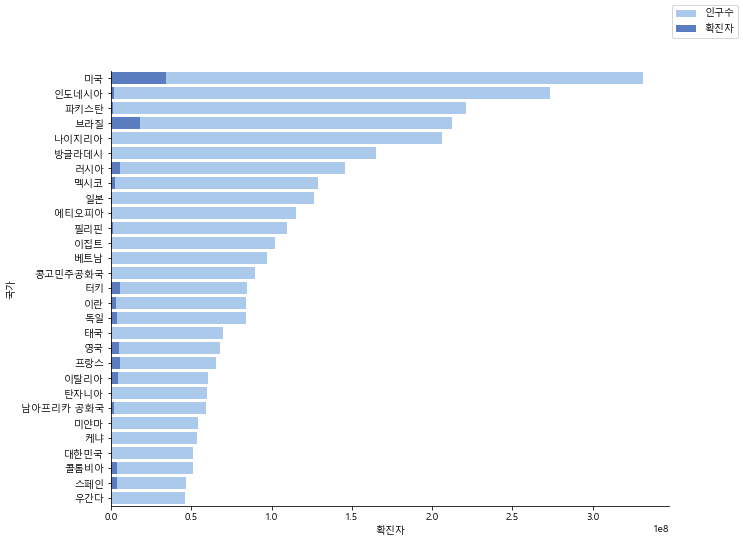

In [52]:
fig = plt.figure(figsize=(10, 8))
fig.patch.set_facecolor('xkcd:white')

sns.set_color_codes('pastel')
sns.barplot(x='인구수', y='국가', data=df3, label='인구수', color='b')

sns.set_color_codes('muted')
sns.barplot(x='확진자', y='국가', data=df3, label='확진자', color='b')

fig.legend(ncol=1, loc="upper right")

sns.despine()

### 데이터 해석 : 
이 데이터에서는 확진자가 눈에 띄게 보이는 몇몇 국가들이 있습니다.

- 미국의 경우에는 전 세계적으로 GDP가 가장 높으면서 확진자가 가장 많습니다. 도심지를 주변으로 사람들이 매우 밀집해있으며, 몇몇 보수적인 시민들의 단체행동으로 인해 확진자가 크게 늘어나게 되었습니다.
- 브라질의 경우에는 대통령이 적극적으로 방역활동을 지시하지 않은 것이 큰 문제점이었습니다. 심지어 대면활동과 경제활동을 장려하기까지 했고, 이로 인해 수많은 사람들이 죽어나갔습니다.
- 그리고 여러 유럽국가에서, 우선 처음으로 변이바이러스가 발생한 곳이 영국이었고, 그를 중심으로 코로나 바이러스가 크게 확산하기도 하였습니다.

## 인구수 하위 30개국 확진자 비율

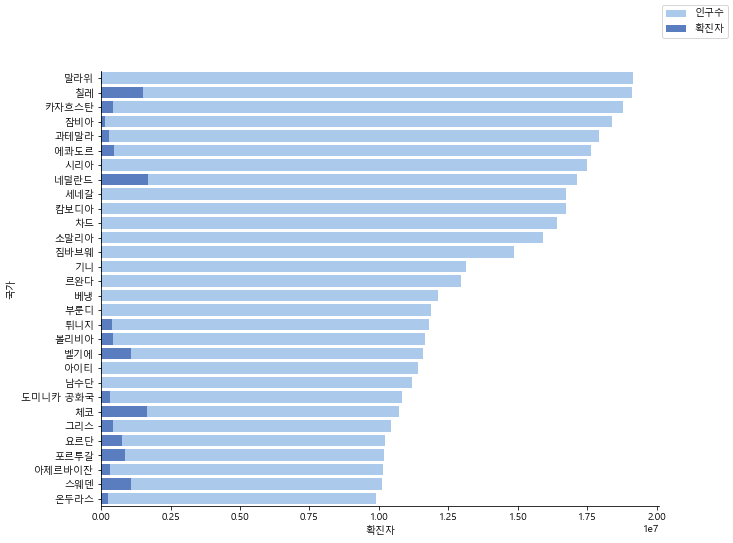

In [53]:
df4 = df1.sort_values(by='인구수', ascending=False).tail(30)

fig = plt.figure(figsize=(10, 8))
fig.patch.set_facecolor('xkcd:white')

sns.set_color_codes('pastel')
sns.barplot(x='인구수', y='국가', data=df4, label='인구수', color='b')

sns.set_color_codes('muted')
sns.barplot(x='확진자', y='국가', data=df4, label='확진자', color='b')

fig.legend(ncol=1, loc="upper right")

sns.despine()

In [54]:
df1['인구밀도'] = df1['인구수']/df1['국토면적']   # 인구밀도 Column 추가
df1

,국가,확진자,치료중,사망자,완치,치명(%),완치(%),발생률,인구수,국토면적,GDP,인구밀도
1,인도,29977861,662521.0,389302,28926038.0,1,97.0,21723,1380004385,3287263,3049.704,419.803461
2,미국,34419838,5034868.0,617463,28767507.0,2,84.0,103987,331002651,9833517,22675.271,33.660658
3,인도네시아,2004445,147728.0,54956,1801761.0,3,90.0,7328,273523615,1904569,1158.783,143.614442
4,파키스탄,949838,33452.0,22034,894352.0,2,94.0,4300,220892340,796095,0.000,277.469825
5,브라질,17969806,1178597.0,502817,16288392.0,3,91.0,84540,212559417,8515770,1491.772,24.960681
6,나이지리아,167292,1377.0,2118,163797.0,1,98.0,812,206139589,923768,514.049,223.150823
7,방글라데시,856304,57196.0,13626,785482.0,2,92.0,5200,164689383,143998,352.908,1143.692155
8,러시아,5334204,326070.0,129801,4878333.0,2,92.0,36552,145934462,17125407,1710.734,8.521518
9,멕시코,2478551,273052.0,231244,1974255.0,9,80.0,19224,128932753,1964375,1192.480,65.635509
10,일본,785969,22248.0,14439,749282.0,2,95.0,6214,126476461,377975,5378.136,334.615943


### GDP 정보가 없는 하위 2개국 삭제하기 !

In [144]:
df5 = df1.sort_values(by='GDP', ascending=False)
# df5 = df5.drop([4])
# df5 = df5.drop([66])

df5

,국가,확진자,치료중,사망자,완치,치명(%),완치(%),발생률,인구수,국토면적,GDP,인구밀도
2,미국,34419838,5034868.0,617463,28767507.0,2,84.0,103987,331002651,9833517,22675.271,33.660658
10,일본,785969,22248.0,14439,749282.0,2,95.0,6214,126476461,377975,5378.136,334.615943
18,독일,3730599,31492.0,91007,3608100.0,2,97.0,44526,83783942,357022,4319.286,234.674451
20,영국,4640507,208530.0,127981,4303996.0,3,93.0,68357,67886011,243610,3124.650,278.666767
1,인도,29977861,662521.0,389302,28926038.0,1,97.0,21723,1380004385,3287263,3049.704,419.803461
21,프랑스,5757798,80626.0,110778,5566394.0,2,97.0,88210,65273511,640679,2938.271,101.881771
22,이탈리아,4253460,76853.0,127291,4049316.0,3,95.0,70350,60461826,301340,2106.287,200.643214
38,캐나다,1409607,11032.0,26084,1372491.0,2,97.0,37348,37742154,9984670,1883.487,3.780010
27,대한민국,151901,6078.0,2006,143817.0,1,95.0,2963,51269185,100412,1806.707,510.588227
8,러시아,5334204,326070.0,129801,4878333.0,2,92.0,36552,145934462,17125407,1710.734,8.521518


## GDP 상위 10개국, 하위 10개국 parameter 별 상관계수 비교  ( Heatmap )

#### 참고자료 )
```
값이 -1.0 ~ -0.7 이면, 강한 음적 상관관계
값이 -0.7 ~ -0.3 이면, 뚜렷한 음적 상관관계
값이 -0.3 ~ -0.1 이면, 약한 음적 상관관계
값이 -0.1 ~ +0.1 이면, 없다고 할 수 있는 상관관계
값이 +0.1 ~ +0.3 이면, 약한 양적 상관관계
값이 +0.3 ~ +0.7 이면, 뚜렷한 양적 상관관계
값이 +0.7 ~ +1.0 이면, 강한 양적 상관관계
```

### < 확진자, 인구수, 국토면적, 사망자, GDP, 완치, 인구밀도 > 

In [91]:
gdp_top10 = df5.sort_values(by='GDP', ascending=False).head(10)
gdp_low10 = df5.sort_values(by='GDP', ascending=False).tail(10)

corr_1 = gdp_top10.loc[:, ['확진자', '인구수', '국토면적', '사망자', 'GDP', '완치', '인구밀도']].corr(method='pearson')
corr_2 = gdp_low10.loc[:, ['확진자', '인구수', '국토면적', '사망자', 'GDP', '완치', '인구밀도']].corr(method='pearson')

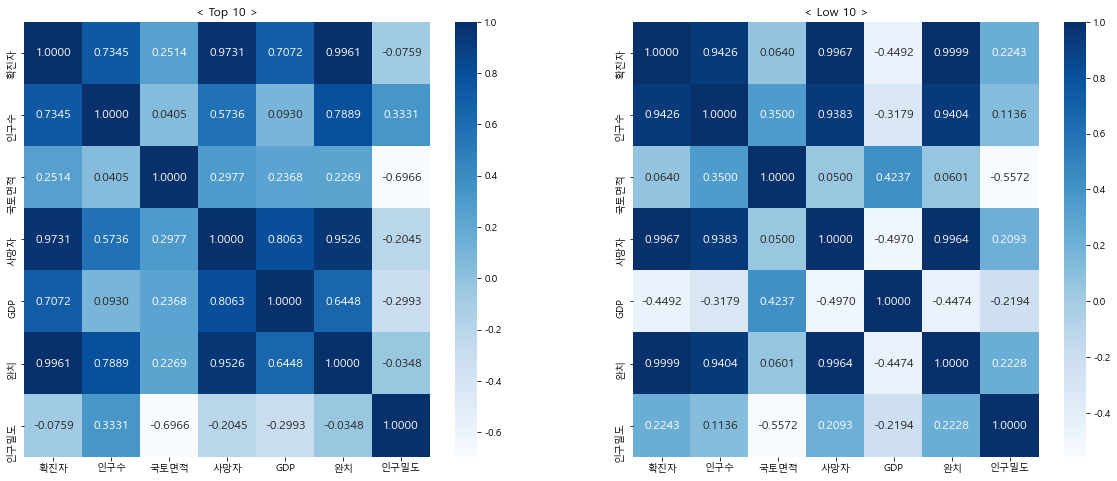

In [92]:
fig = plt.figure(figsize=(20, 8))
fig.patch.set_facecolor('xkcd:white')

axis1 = fig.add_subplot(1, 2, 1)
axis1 = sns.heatmap(corr_1, annot=True, annot_kws={'size':12}, fmt='.4f', cmap='Blues')
plt.title('< Top 10 >')
axis1.plot()

axis2 = fig.add_subplot(1, 2, 2)
axis2 = sns.heatmap(corr_2, annot=True, annot_kws={'size':12}, fmt='.4f', cmap='Blues')
plt.title('< Low 10 >')
axis2.plot()

plt.show()

### 데이터 해석 : 
우선, 기본적으로 7개의 parameter 간의 상관관계를 분석하는 것이기 때문에 Heatmap으로 표현하긴 했지만 조금 복잡하게 보이긴합니다. 그래서 이 Heatmap은 훑어보듯이 넘어가고 대충 어떤 느낌인지만 설명하려고 합니다.

---

#### Top 10 나라의 경우
인구밀도를 제외한 나머지의 Parameter에서 매우 높은 상관관계를 보이거나 낮은 정도의 상관관계를 보입니다. 인구밀도 기준으로 보았을 때, 인구수를 제외하고는 다 상관관계가 음수(-)의 값을 가집니다. 왜냐하면 ```인구밀도 = 인구수 / 국토면적``` 이기 때문에 당연한 결과라고 볼 수 있겠습니다. 같은 원리로, 인구밀도와 국토면적은 반비례관계이기 때문에 상관계수가 -0.7로 상당히 낮은 것을 볼 수 있습니다. 나머지 parameter 간의 관계는 다음 축소된 Heatmap을 보면서 추가적으로 설명해보겠습니다.

---

#### GDP가 낮은 하위 10개 나라의 경우
Low 10 국가의 경우 Top 10 국가와 비교해서 parameter 간의 관계가 극명하게 나뉜 것을 볼 수 있습니다. 아무래도 경제상황이 좋지 못하다 보니 이런 상관관계를 보이는 것이 아닐까 예상해볼 수 있습니다. 다음 Heatmap을 보면서 Top 10 국가와 어떻게 차이가 나는지 살펴보도록 하겠습니다.

### 상관관계를 시각화 하기 위한 ScatterPlot, 회귀직선

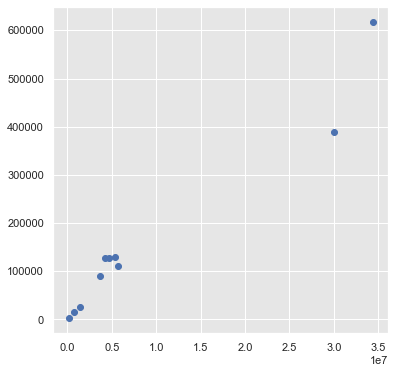

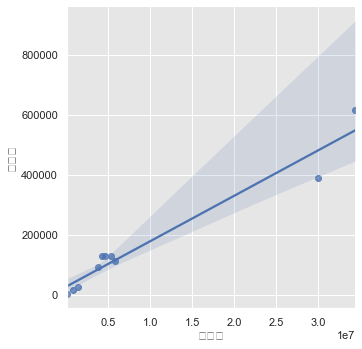

In [114]:
fig = plt.figure(figsize=(6,6), facecolor='white')

plt.scatter(x='확진자',y='사망자',data=gdp_top10)
plt.show()

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.lmplot(x='확진자',y='사망자',data=gdp_top10)

### < 확진자, 인구수, 국토면적, 사망자, GDP, 완치 > 

In [93]:
gdp_top10 = df5.sort_values(by='GDP', ascending=False).head(10)
gdp_low10 = df5.sort_values(by='GDP', ascending=False).tail(10)

corr_1 = gdp_top10.loc[:, ['확진자', '인구수', '국토면적', '사망자', 'GDP', '완치']].corr(method='pearson')
corr_2 = gdp_low10.loc[:, ['확진자', '인구수', '국토면적', '사망자', 'GDP', '완치']].corr(method='pearson')

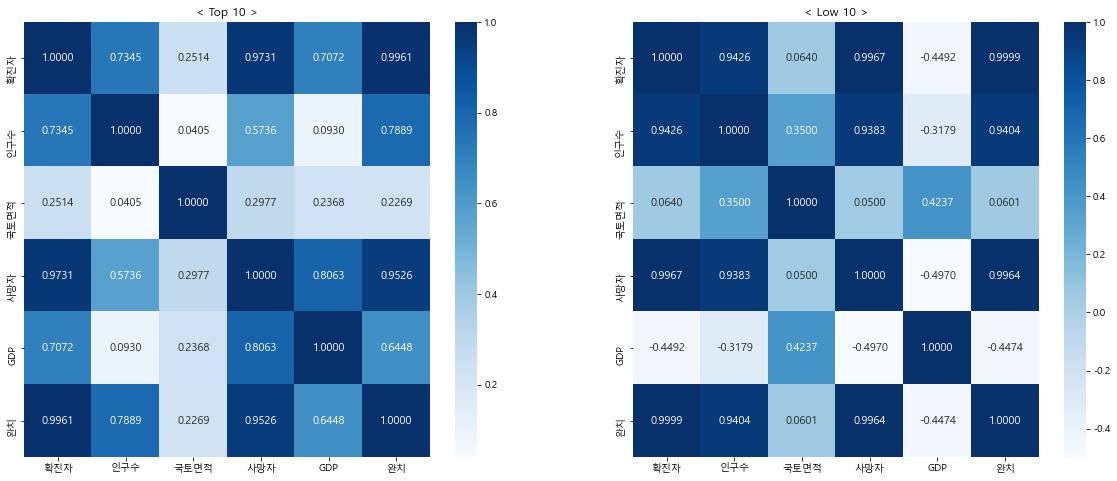

In [94]:
fig = plt.figure(figsize=(20, 8))
fig.patch.set_facecolor('xkcd:white')

axis1 = fig.add_subplot(1, 2, 1)
axis1 = sns.heatmap(corr_1, annot=True, annot_kws={'size':11}, fmt='.4f', cmap='Blues')
plt.title('< Top 10 >')
axis1.plot()

axis2 = fig.add_subplot(1, 2, 2)
axis2 = sns.heatmap(corr_2, annot=True, annot_kws={'size':11}, fmt='.4f', cmap='Blues')
plt.title('< Low 10 >')
axis2.plot()

plt.show()

### 데이터 해석 : 
인구밀도 parameter를 제거하고 나니 Heatmap이 더 명확해지면서 parameter 간의 상관관계를 더욱 파악하기 쉬워졌습니다.

---

#### Top 10 나라의 경우
국토면적이 다른 parameter들과 비교해서 약한 상관관계를 가지는 것을 알 수 있습니다. 즉, 국토면적의 넓고 좁음이 확진자에 끼치는 영향이 크지 않다고 해석할 수 있을 것 같습니다. 

그리고 `국토면적 - 인구수`, `인구수 - GDP`의 관계가 약한 것을 볼 수 있는데 그렇다고 `국토면적 - GDP`의 관계는 그렇게 약하지는 않구나라는 것을 알 수 있습니다. 

추가적으로, 국토면적이 넓다고 꼭 인구수가 많은 것은 아니며(상관계수 = 0.0405), GDP가 높다고 꼭 인구수가 많은 것은 아니라고(상관계수 = 0.0930) 판단할 수 있습니다.

---

#### Low 10 나라의 경우
Low 10 국가와 Top 10 국가와의 차이가 극명하게 보이는 것 같습니다. 대표적으로, GDP와 다른 parameter와의 상관관계가 크지 않다는 점을 뽑을 수 있습니다. 세부적인 내용들을 설명해보겠습니다.

1. GDP와 Covid-19 환자(확진자, 사망자, 완치자)와의 관계 :
Top 10 나라에서는 비교적 높은 상관관계를 가지는 것에 비해 Low 10 나라에서는 오히려 약한 음의 상관관계를 가지는 것을 알 수 있습니다. 조금 과장해서 말하면 반비례 관계를 가지므로, 이 나라들 사이에서는 GDP가 높을 수록 그렇지 않은 나라들에 비해 확진자가 더 적다고 판단할 수 있습니다. 
\
이러한 결과가 나오는 이유는, GDP가 높은 선진국의 경우에 크게 발달한 도심지와 사람들의 높은 소비수준으로 인해 사람들 간의 전염이 빠르고 치명적이었습니다. 반면에 GDP가 낮은 나라의 경우에는 사람들이 한 지역에 많이 밀집해 있을 가능성이 낮고, 이러한 나라들에 있어서 GDP가 높은 것이 사람들 간의 적극적인 소비활동과 직접적인 접촉이 많이 생긴다는 것을 의미하지 않기 때문으로 해석할 수 있습니다.
\
\
2. GDP와 국토면적의 관계 : 
Top 10 나라의 상관계수(0.2368)에 비해 Low 10 나라의 상관계수(0.4237)가 조금 더 의미있는 수치를 가지는 것을 알 수 있습니다. 즉, Top 10 나라에 비해 국토면적이 넓을 수록 GDP가 더 높을 수 있다는 것을 판단할 수 있습니다.
\
\
3. 국토면적과 인구수의 관계 : 
Top 10 나라의 상관계수(0.0405)에 비해 Low 10 나라의 상관계수(0.3500)가 비교적 더 높습니다. 즉, 이 카테고리에서는 국토면적이 넓을수록 인구 수가 더 많을 수 있다는 것을 알 수 있습니다.
\
\
4. 인구수와 Covid-19 환자(확진자, 사망자, 완치자)와의 관계 : 
Top 10 나라에 비해 인구수 대비 Covid-19 환자의 상관계수가 상당히 높은 것을 알 수 있습니다(거의 1의 상관관계). 즉, 인구 수가 많을수록 그에 비례해 확진자도 많다는 뜻입니다. 
\
이 수치가 의미하는 것은 GDP가 높은 나라에서는 인구가 많아도 감염을 예방할 수 있는 수 많은 인적자원과 물자, 개인이 비축할 수 있는 보급품들이 많아 어느정도 예방이 가능했다는 뜻입니다. 반면에, GDP가 낮은 나라의 경우에는 이러한 물자들이 부족하기 때문에 Covid-19를 예방할 수 있는 시민들의 경제적인 능력과 국가적 능력이 부족하다고 해석할 수 있습니다.

### < 확진자, 인구수, 사망자, GDP, 완치 > : 마지막으로 국토면적 항목을 삭제하고 출력해보았습니다.

In [115]:
gdp_top10 = df5.sort_values(by='GDP', ascending=False).head(10)
gdp_low10 = df5.sort_values(by='GDP', ascending=False).tail(10)

corr_1 = gdp_top10.loc[:, ['확진자', '인구수', '사망자', '완치', 'GDP']].corr(method='pearson')
corr_2 = gdp_low10.loc[:, ['확진자', '인구수', '사망자', '완치', 'GDP']].corr(method='pearson')

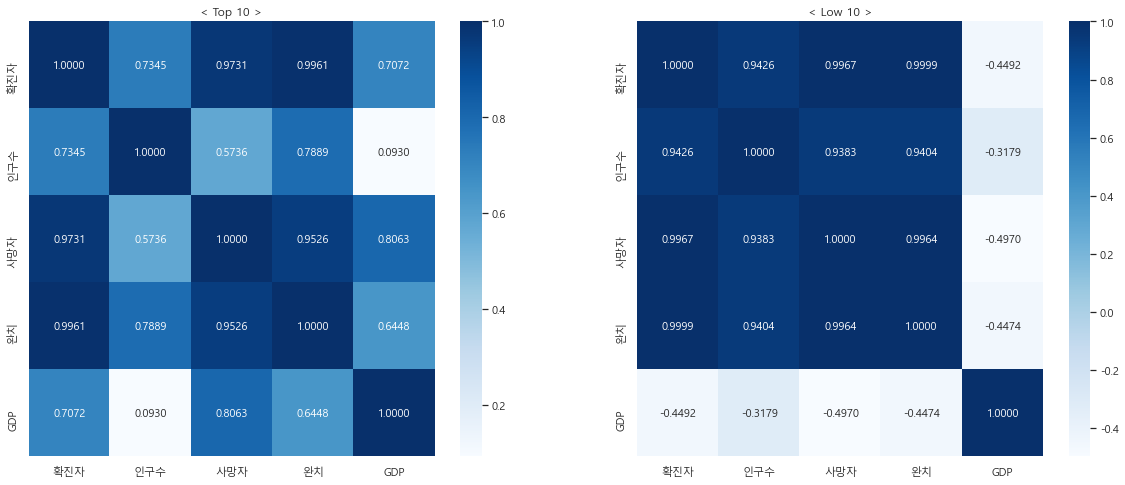

In [118]:
fig = plt.figure(figsize=(20, 8))
fig.patch.set_facecolor('xkcd:white')

axis1 = fig.add_subplot(1, 2, 1)
axis1 = sns.heatmap(corr_1, annot=True, annot_kws={'size':11}, fmt='.4f', cmap='Blues')
plt.title('< Top 10 >')
axis1.plot()

axis2 = fig.add_subplot(1, 2, 2)
axis2 = sns.heatmap(corr_2, annot=True, annot_kws={'size':11}, fmt='.4f', cmap='Blues')
plt.title('< Low 10 >')
axis2.plot()

plt.show()

## GDP 상위 10개국, 하위 10개국 parameter 별 수치 비교 ( 중국 제외 )

위에서 parameter 간의 상관관계를 비교했다면 이제는 `수치`를 비교해보자!

### < GDP 비교 >

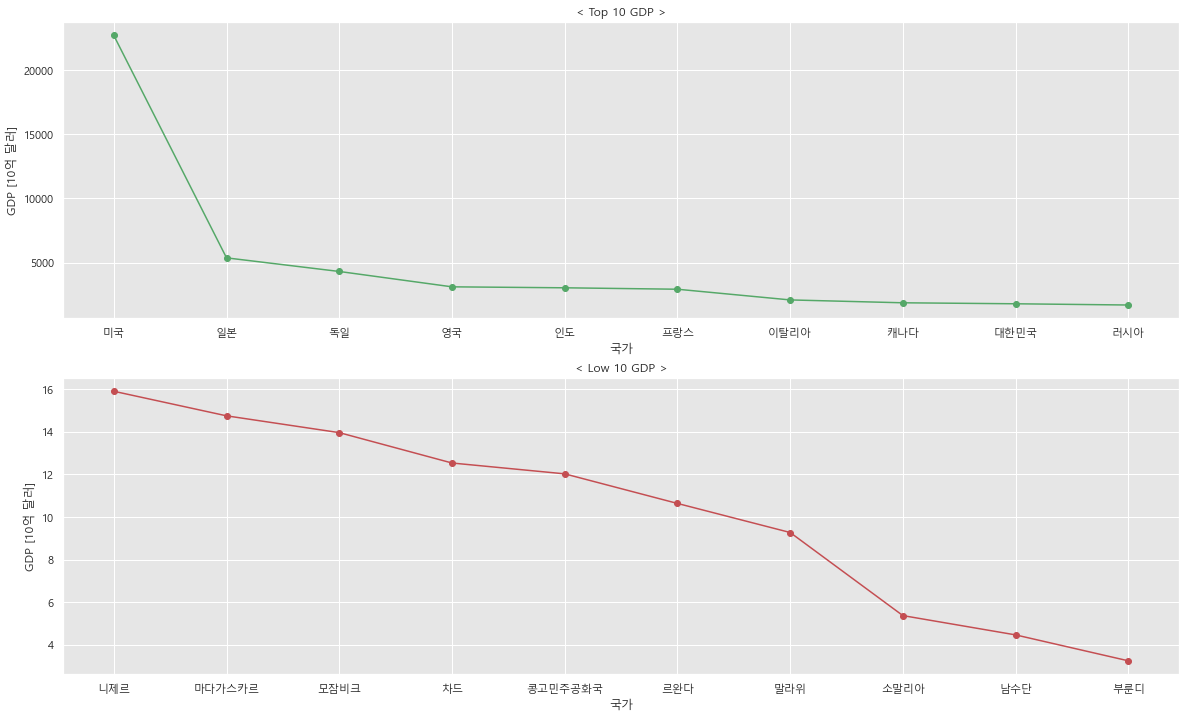

In [146]:
gdp_list = df5.sort_values(by='GDP', ascending=False)

top_names = list(gdp_list['국가'].head(10))
top_values = list(gdp_list['GDP'].head(10))
top_values = list(map(float, top_values))

low_names = list(gdp_list['국가'].tail(10))
low_values = list(gdp_list['GDP'].tail(10))
low_values = list(map(float, low_values))

fig = plt.figure(figsize=(20, 12), facecolor='white')

axis1 = fig.add_subplot(2, 1, 1)
plt.plot(top_names, top_values, 'go-')
plt.title('< Top 10 GDP >')
plt.xlabel('국가')
plt.ylabel('GDP [10억 달러]')

axis2 = fig.add_subplot(2, 1, 2)
plt.plot(low_names, low_values, 'ro-')
plt.title('< Low 10 GDP >')
plt.xlabel('국가')
plt.ylabel('GDP [10억 달러]')

plt.show()

#### 상위 10개국과 하위 10개국의 수치 차이가 상당히 심한 것을 볼 수 있습니다.

### < 확진자 & 인구수 비교 >

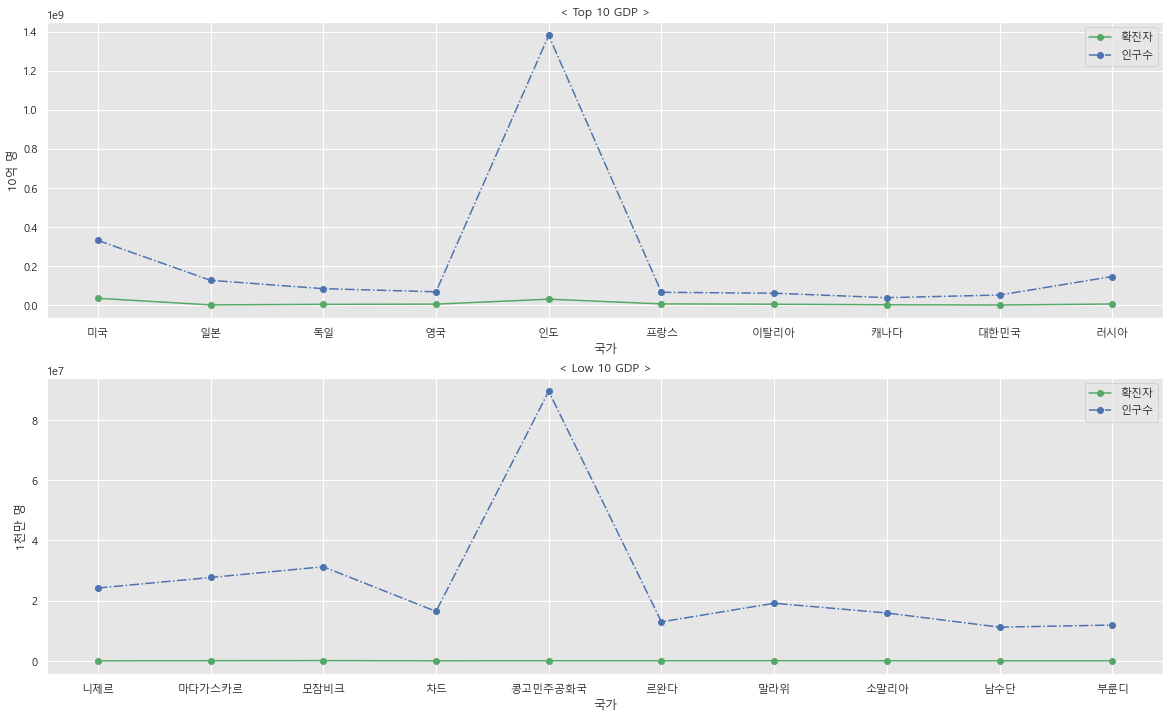

Top 10 인구수 : [331002651.0, 126476461.0, 83783942.0, 67886011.0, 1380004385.0, 65273511.0, 60461826.0, 37742154.0, 51269185.0, 145934462.0]
Top 10 확진자수 : [34419838.0, 785969.0, 3730599.0, 4640507.0, 29977861.0, 5757798.0, 4253460.0, 1409607.0, 151901.0, 5334204.0]
Low 10 인구수 : [24206644.0, 27691018.0, 31255435.0, 16425864.0, 89561403.0, 12952218.0, 19129952.0, 15893222.0, 11193725.0, 11890784.0]
Low 10 확진자수 : [5469.0, 42137.0, 72577.0, 4947.0, 37926.0, 31435.0, 34914.0, 14867.0, 10786.0, 5242.0]


In [154]:
top_names = list(gdp_list['국가'].head(10))
top_values_1 = list(gdp_list['확진자'].head(10))
top_values_1 = list(map(float, top_values_1))
top_values_2 = list(gdp_list['인구수'].head(10))
top_values_2 = list(map(float, top_values_2))

low_names = list(gdp_list['국가'].tail(10))
low_values_1 = list(gdp_list['확진자'].tail(10))
low_values_1 = list(map(float, low_values_1))
low_values_2 = list(gdp_list['인구수'].tail(10))
low_values_2 = list(map(float, low_values_2))

fig = plt.figure(figsize=(20, 12), facecolor='white')

axis1 = fig.add_subplot(2, 1, 1)
plt.plot(top_names, top_values_1, 'go-')
plt.plot(top_names, top_values_2, 'bo-.')
plt.title('< Top 10 GDP >')
plt.legend(['확진자', '인구수'])
plt.xlabel('국가')
plt.ylabel('10억 명')

axis2 = fig.add_subplot(2, 1, 2)
plt.plot(low_names, low_values_1, 'go-')
plt.plot(low_names, low_values_2, 'bo-.')
plt.title('< Low 10 GDP >')
plt.legend(['확진자', '인구수'])
plt.xlabel('국가')
plt.ylabel('1천만 명')

plt.show()

print('Top 10 인구수 :', top_values_2)
print('Top 10 확진자수 :', top_values_1)
print('Low 10 인구수 :', low_values_2)
print('Low 10 확진자수 :', low_values_1)

#### 확진자 비율이 낮은 관계로 확진자만 다시 출력

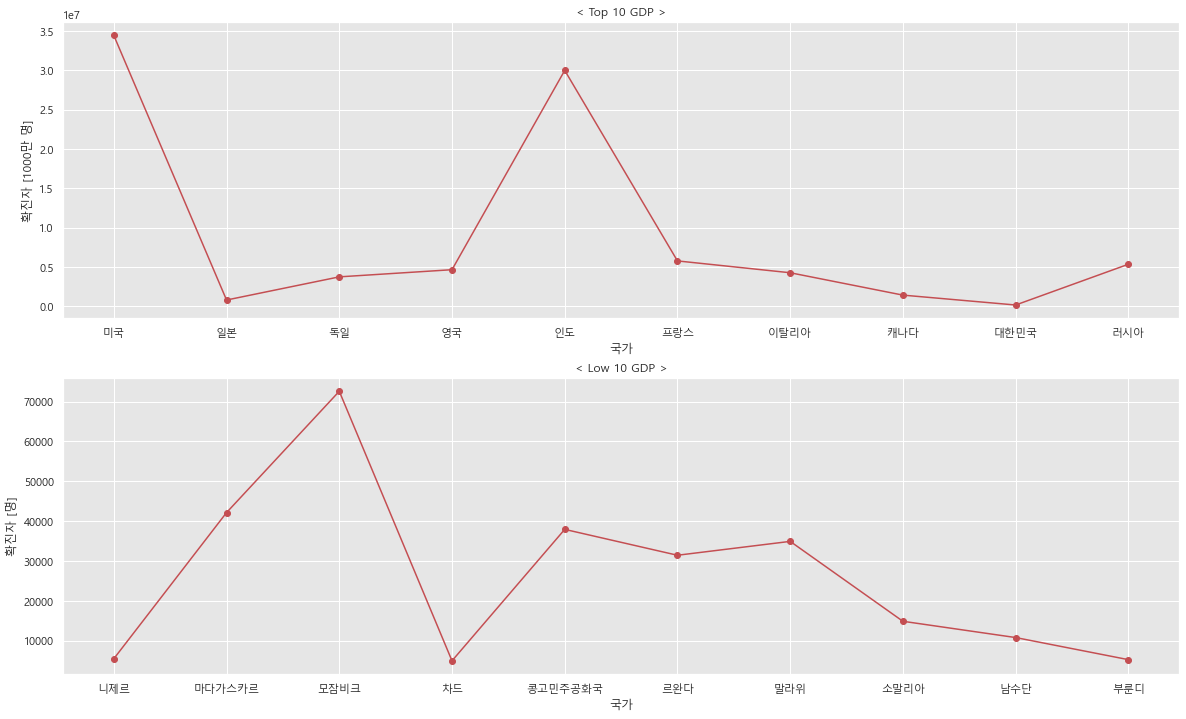

In [160]:
top_names = list(gdp_list['국가'].head(10))
top_values = list(gdp_list['확진자'].head(10))
top_values = list(map(float, top_values))

low_names = list(gdp_list['국가'].tail(10))
low_values = list(gdp_list['확진자'].tail(10))
low_values = list(map(float, low_values))

fig = plt.figure(figsize=(20, 12), facecolor='white')

axis1 = fig.add_subplot(2, 1, 1)
plt.plot(top_names, top_values, 'ro-')
plt.title('< Top 10 GDP >')
plt.xlabel('국가')
plt.ylabel('확진자 [1000만 명]')

axis2 = fig.add_subplot(2, 1, 2)
plt.plot(low_names, low_values, 'ro-')
plt.title('< Low 10 GDP >')
plt.xlabel('국가')
plt.ylabel('확진자 [명]')

plt.show()

### < 사망자 비교 >

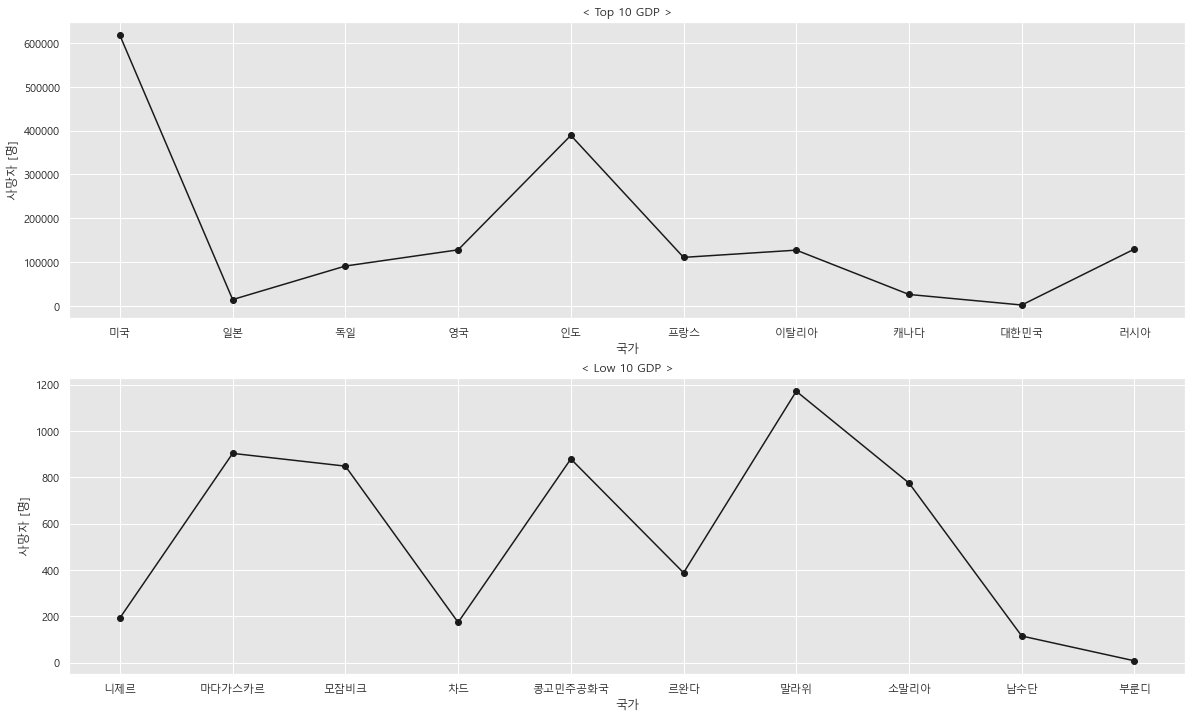

In [161]:
top_names = list(gdp_list['국가'].head(10))
top_values = list(gdp_list['사망자'].head(10))
top_values = list(map(float, top_values))

low_names = list(gdp_list['국가'].tail(10))
low_values = list(gdp_list['사망자'].tail(10))
low_values = list(map(float, low_values))

fig = plt.figure(figsize=(20, 12), facecolor='white')

axis1 = fig.add_subplot(2, 1, 1)
plt.plot(top_names, top_values, 'ko-')
plt.title('< Top 10 GDP >')
plt.xlabel('국가')
plt.ylabel('사망자 [명]')

axis2 = fig.add_subplot(2, 1, 2)
plt.plot(low_names, low_values, 'ko-')
plt.title('< Low 10 GDP >')
plt.xlabel('국가')
plt.ylabel('사망자 [명]')

plt.show()

### < 완치자 비교 >

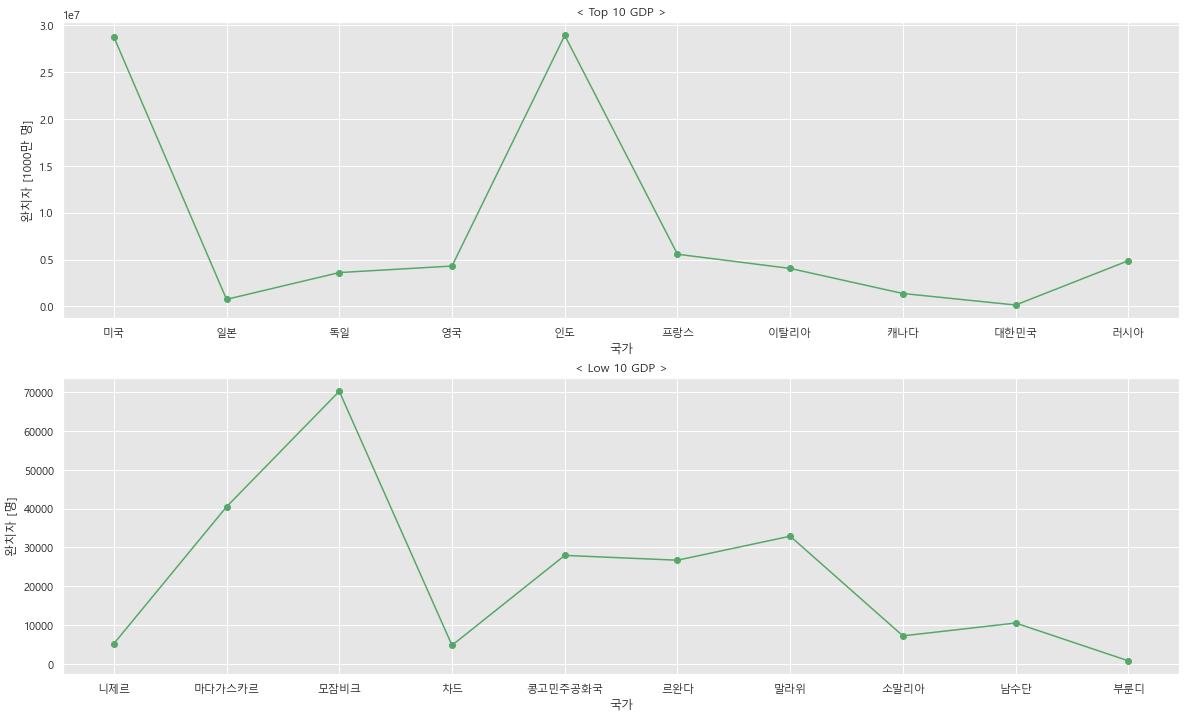

In [157]:
top_names = list(gdp_list['국가'].head(10))
top_values = list(gdp_list['완치'].head(10))
top_values = list(map(float, top_values))

low_names = list(gdp_list['국가'].tail(10))
low_values = list(gdp_list['완치'].tail(10))
low_values = list(map(float, low_values))

fig = plt.figure(figsize=(20, 12), facecolor='white')

axis1 = fig.add_subplot(2, 1, 1)
plt.plot(top_names, top_values, 'go-')
plt.title('< Top 10 GDP >')
plt.xlabel('국가')
plt.ylabel('완치자 [1000만 명]')

axis2 = fig.add_subplot(2, 1, 2)
plt.plot(low_names, low_values, 'go-')
plt.title('< Low 10 GDP >')
plt.xlabel('국가')
plt.ylabel('완치자 [명]')

plt.show()

### < 인구밀도 비교 >

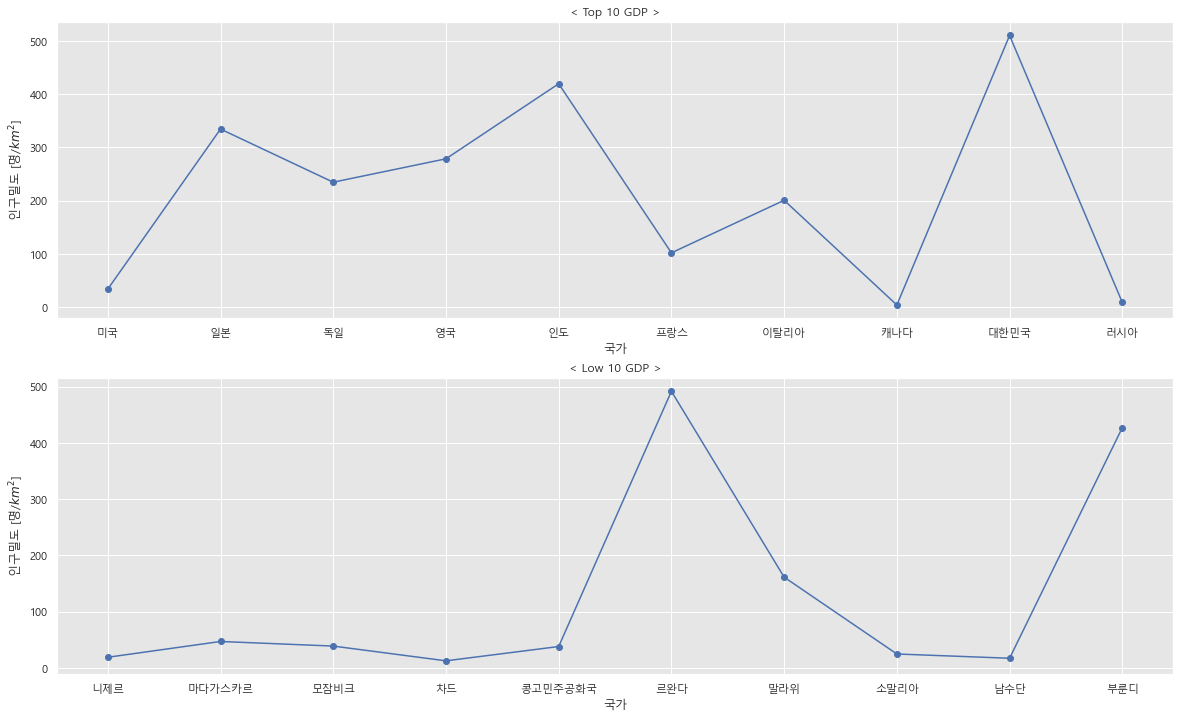

In [159]:
top_names = list(gdp_list['국가'].head(10))
top_values = list(gdp_list['인구밀도'].head(10))
top_values = list(map(float, top_values))

low_names = list(gdp_list['국가'].tail(10))
low_values = list(gdp_list['인구밀도'].tail(10))
low_values = list(map(float, low_values))

fig = plt.figure(figsize=(20, 12), facecolor='white')

axis1 = fig.add_subplot(2, 1, 1)
plt.plot(top_names, top_values, 'bo-')
plt.title('< Top 10 GDP >')
plt.xlabel('국가')
plt.ylabel('인구밀도 [명/$km^2$]')

axis2 = fig.add_subplot(2, 1, 2)
plt.plot(low_names, low_values, 'bo-')
plt.title('< Low 10 GDP >')
plt.xlabel('국가')
plt.ylabel('인구밀도 [명/$km^2$]')

plt.show()

### < 치명율 비교 >

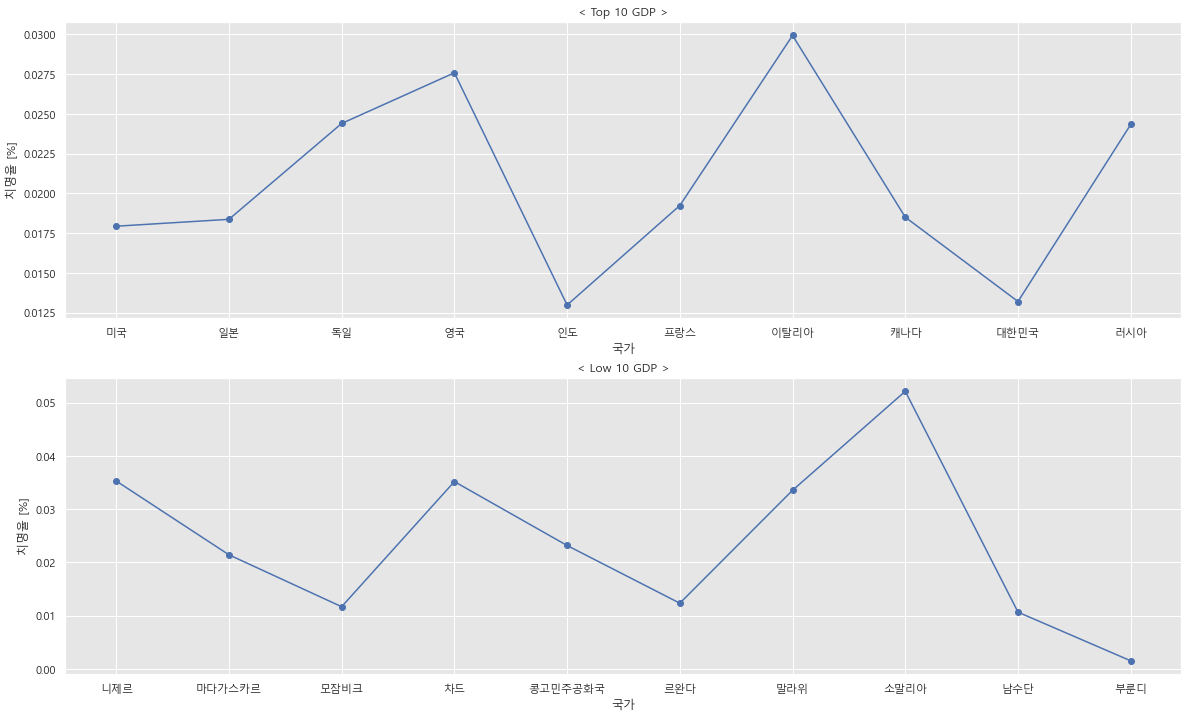

In [163]:
gdp_list_1 = df5.sort_values(by='GDP', ascending=False)

gdp_list_1['치명율'] = gdp_list_1['사망자']/gdp_list_1['확진자']   # 치명율 Column 추가

top_names = list(gdp_list_1['국가'].head(10))
top_values = list(gdp_list_1['치명율'].head(10))
top_values = list(map(float, top_values))

low_names = list(gdp_list_1['국가'].tail(10))
low_values = list(gdp_list_1['치명율'].tail(10))
low_values = list(map(float, low_values))

fig = plt.figure(figsize=(20, 12), facecolor='white')

axis1 = fig.add_subplot(2, 1, 1)
plt.plot(top_names, top_values, 'bo-')
plt.title('< Top 10 GDP >')
plt.xlabel('국가')
plt.ylabel('치명율 [%]')

axis2 = fig.add_subplot(2, 1, 2)
plt.plot(low_names, low_values, 'bo-')
plt.title('< Low 10 GDP >')
plt.xlabel('국가')
plt.ylabel('치명율 [%]')

plt.show()